In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
food_order = pd.read_csv("C:\\Users\\OM\\Desktop\\My Projects\\Food-Delivery-Cost-and-Profit-Analysis\\data\\food_orders.csv")
food_order.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [7]:
food_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [9]:
food_order.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [13]:
food_order['Order Date and Time']  = pd.to_datetime(food_order['Order Date and Time'])
food_order['Delivery Date and Time'] = pd.to_datetime(food_order['Delivery Date and Time'])
food_order.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [15]:
def extract_discount(discount_str) :
    if isinstance(discount_str,float):
        return float(discount_str)
    elif 'off' in discount_str:
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        return float(discount_str.split('%')[0])
    else:
        return 0.0

food_order['Discount Percentage'] = food_order['Discounts and Offers'].apply(lambda x : extract_discount(x))


food_order['Discount Amount'] = food_order.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] > 1
                                                   else x['Discount Percentage'], axis=1)

food_order['Discount Amount'] = food_order.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

food_order[['Order Value','Discounts and Offers', 'Discount Percentage','Discount Amount']].head()

,Order Value,Discounts and Offers,Discount Percentage,Discount Amount
0,1914,5% on App,5.0,95.70
1,986,10%,10.0,98.60
2,937,15% New User,15.0,140.55
3,1463,NaN,NaN,NaN
4,1992,50 off Promo,50.0,996.00


In [17]:
food_order.dtypes

Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount                  float64
dtype: object

In [19]:
food_order['TotalCost']= food_order['Delivery Fee'] + food_order['Discount Amount'] + food_order['Payment Processing Fee']
food_order['Revenue'] = food_order['Commission Fee']
food_order['Profit'] = food_order['Revenue'] - food_order['TotalCost']

totalOrders = food_order.shape[0]
totalRevenue = food_order['Revenue'].sum()
totalProfit = food_order['Profit'].sum()
totalCost = food_order['TotalCost'].sum()

metrices = {
    'Total Orders' : totalOrders,
    'Total Cost' : totalCost,
    'Total Revenue' : totalRevenue,
    'Total Profit' : totalProfit
}

for key,value in metrices.items():
    print(f"{key} : {value}")

Total Orders : 1000
Total Cost : 221741.84999999998
Total Revenue : 126990
Total Profit : -117943.85


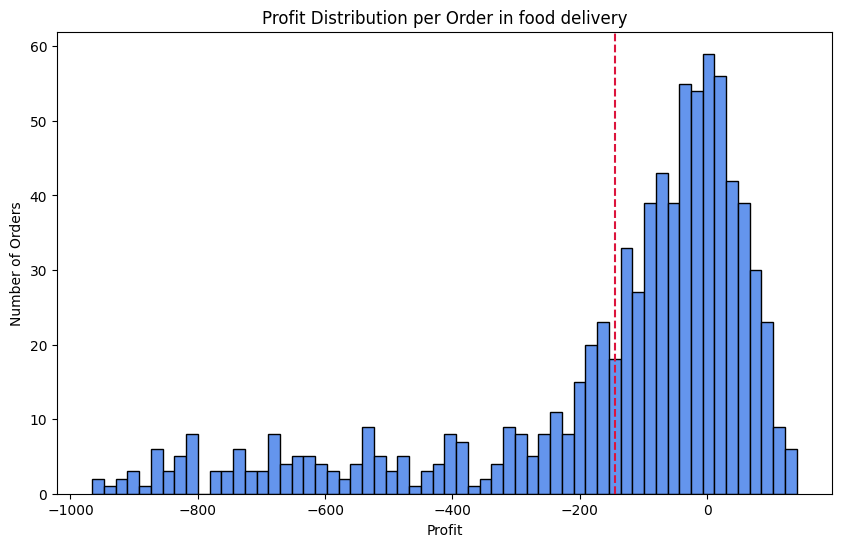

In [21]:
plt.figure(figsize=(10,6))
plt.hist(food_order['Profit'],bins = 60,color='cornflowerblue',edgecolor = 'black')
plt.title('Profit Distribution per Order in food delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_order['Profit'].mean(),color='crimson',linestyle = 'dashed',linewidth='1.5')
plt.show()

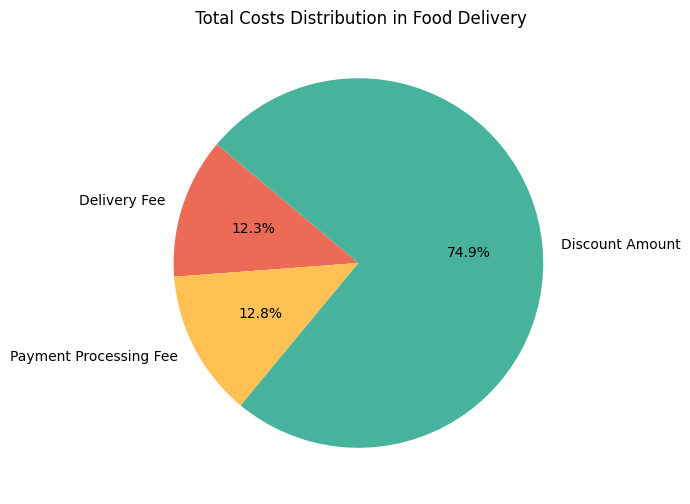

In [25]:
cost_distribution = food_order[['Delivery Fee','Payment Processing Fee','Discount Amount']].sum()
plt.figure(figsize=(6, 6))
plt.pie(cost_distribution,labels = cost_distribution.index,autopct='%1.1f%%',startangle=140,colors=['#EC6B56','#FFC154','#47B39C'])
plt.title(' Total Costs Distribution in Food Delivery')
plt.show()

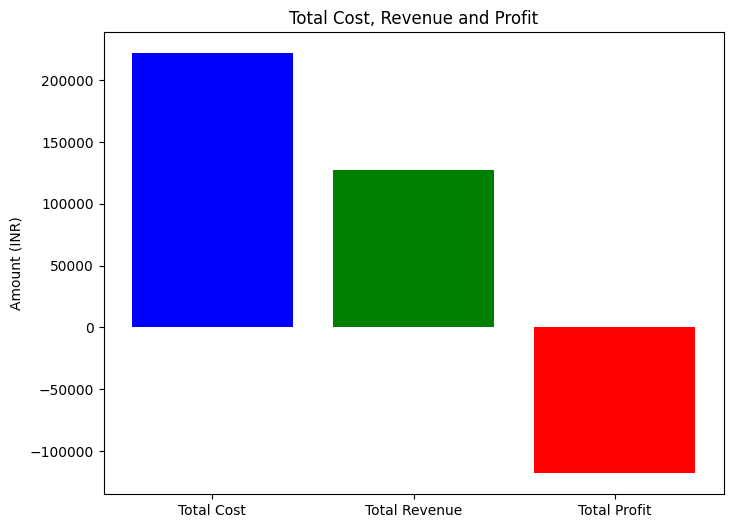

In [27]:
totals = ['Total Cost','Total Revenue','Total Profit']
value = [totalCost,totalRevenue,totalProfit]

plt.figure(figsize=(8,6))
plt.bar(totals,value,color=['blue','green','red'])
plt.title("Total Cost, Revenue and Profit")
plt.ylabel('Amount (INR)')
plt.show()

In [41]:
profitable_orders = food_order[food_order['Profit']>1]
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee']/profitable_orders['Order Value'])*100
profitable_orders['Effective Discount'] = (profitable_orders['Discount Amount']/profitable_orders['Order Value'])*100

new_avg_commission = profitable_orders['Commission Percentage'].mean()
new_avg_discount = profitable_orders['Effective Discount'].mean()

print(new_avg_commission,new_avg_discount)

37.354485751019986 9.9375


C:\Users\OM\AppData\Local\Temp\ipykernel_15236\2798012272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee']/profitable_orders['Order Value'])*100
C:\Users\OM\AppData\Local\Temp\ipykernel_15236\2798012272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount'] = (profitable_orders['Discount Amount']/profitable_orders['Order Value'])*100


In [43]:
recommended_commission_percentage = 32.0
recommended_discount = 5.0

food_order['Simulated Commission Fee'] = food_order['Order Value'] * (recommended_commission_percentage / 100)
food_order['Simulated Discount Amount'] = food_order['Order Value'] * (recommended_discount/ 100)

food_order['Simulated Total Cost'] = food_order['Delivery Fee'] + food_order['Payment Processing Fee'] + food_order['Simulated Discount Amount']
food_order['Simulated Profit'] = food_order['Simulated Commission Fee'] - food_order['Simulated Total Cost']

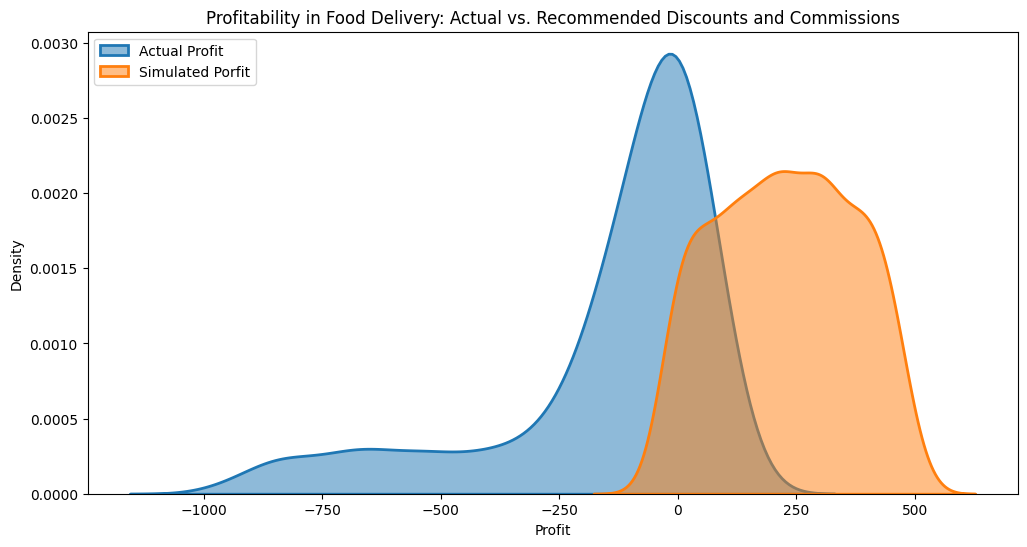

In [45]:
plt.figure(figsize=(12, 6))
sns.kdeplot(food_order['Profit'],label='Actual Profit',fill=True,alpha=0.5,linewidth = 2)
sns.kdeplot(food_order['Simulated Profit'],label='Simulated Porfit',fill=True,alpha=0.5,linewidth=2)

plt.title('Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()